# Connexion de Python à Neo4j

In [ ]:
from neo4j import GraphDatabase

# Connexion à Neo4j
uri = "bolt://localhost:7687"
user = "neo4j"
password = "password"

driver = GraphDatabase.driver(uri, auth=(user, password))

def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return [record for record in result]  # Stocker les résultats dans une liste

# Vérification de la connexion
try:
    test_query = "RETURN 'Connexion réussie' AS message"
    result = run_query(test_query)
    for record in result:
        print(record["message"])
except Exception as e:
    print("Erreur de connexion :", e)

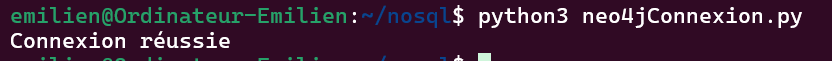

# Création de nœuds

In [ ]:
person1 = "CREATE (p:Person {name: 'Alice', age: 30})"
person2 = "CREATE (p:Person {name: 'Bob', age: 25})"
person3 = "CREATE (p:Person {name: 'Charlie', age: 35})"

run_query(person1)
run_query(person2)
run_query(person3)

print("Les nœuds Person ont été créés avec succès.")

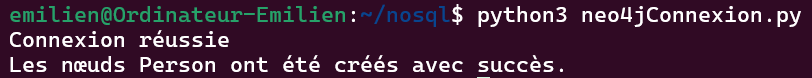

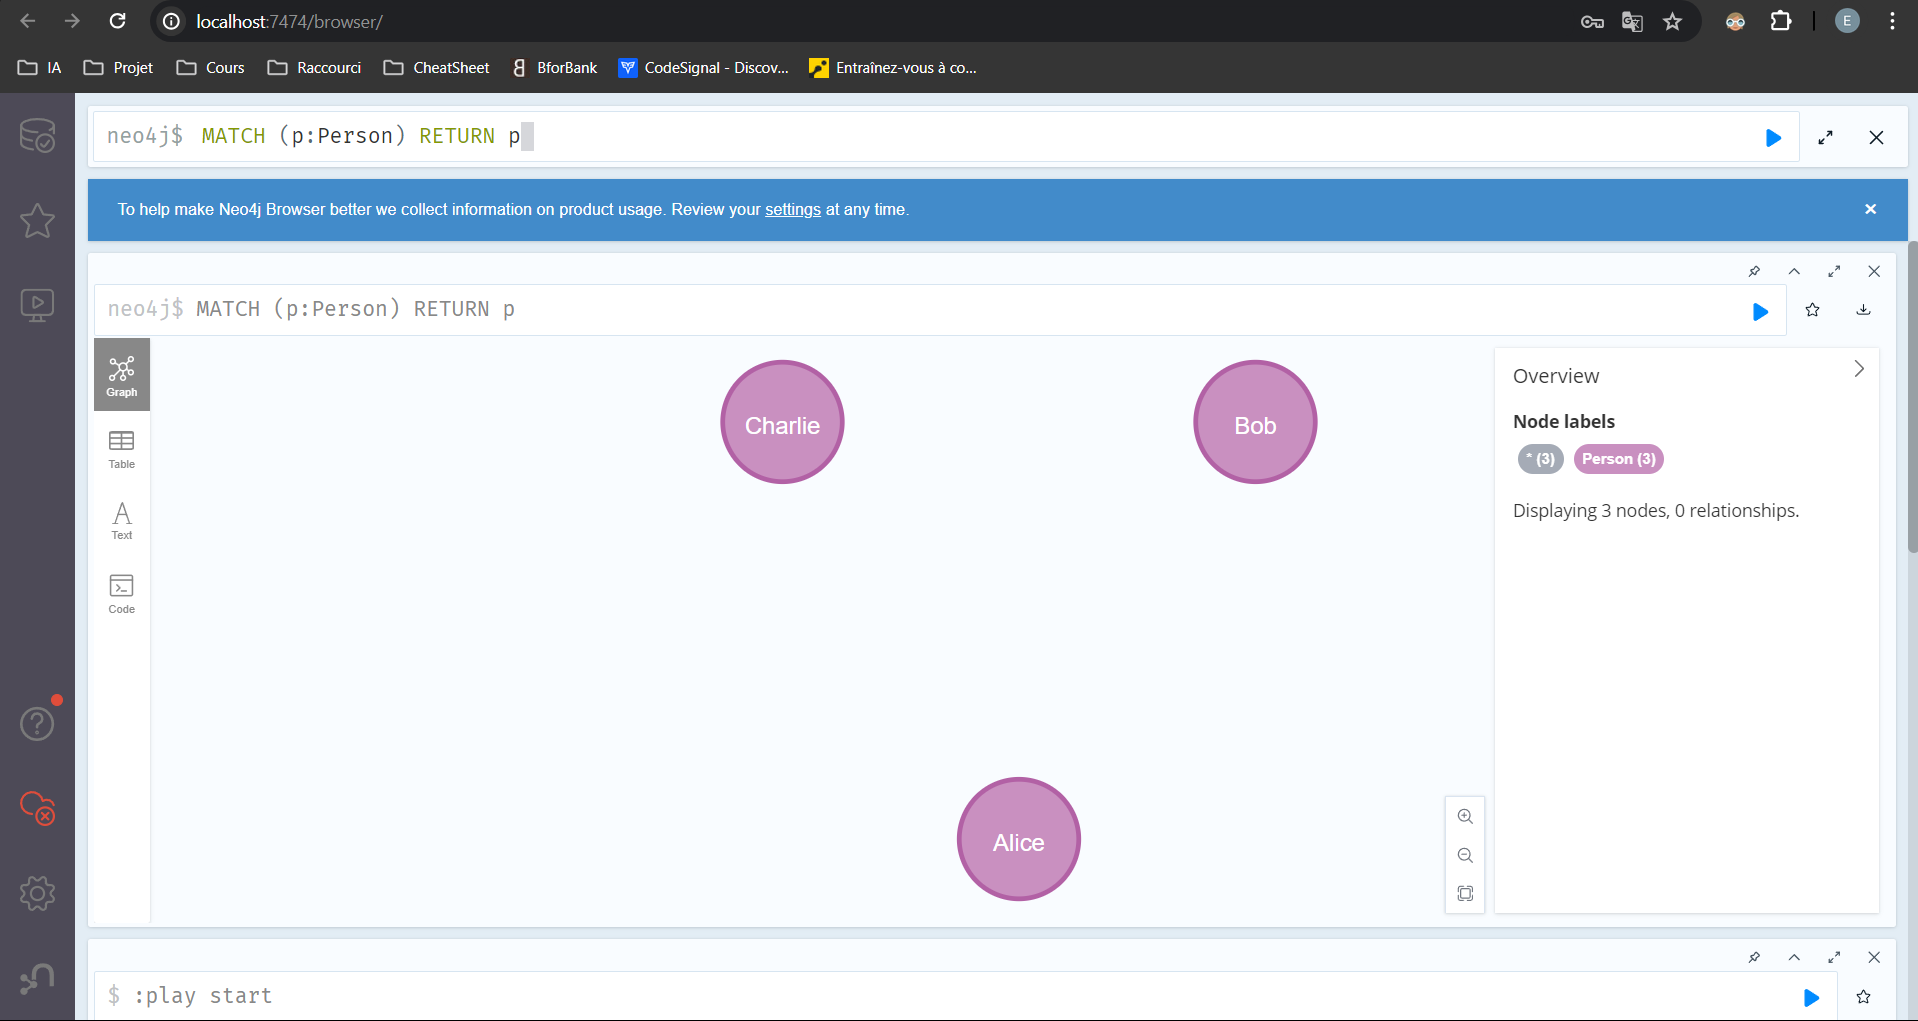

# Création de relations

In [ ]:
relationship1 = "MATCH (a:Person {name: 'Alice'}), (b:Person {name: 'Bob'}) CREATE (a)-[:FRIEND]->(b)"
relationship2 = "MATCH (a:Person {name: 'Alice'}), (b:Person {name: 'Charlie'}) CREATE (a)-[:FRIEND]->(b)"
relationship3 = "MATCH (a:Person {name: 'Bob'}), (b:Person {name: 'Charlie'}) CREATE (a)-[:FRIEND]->(b)"

run_query(relationship1)
run_query(relationship2)
run_query(relationship3)

print("Relations créées avec succès !")

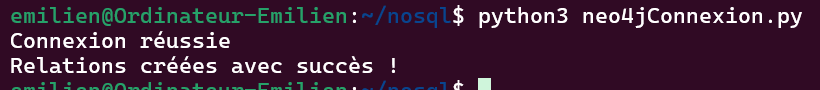

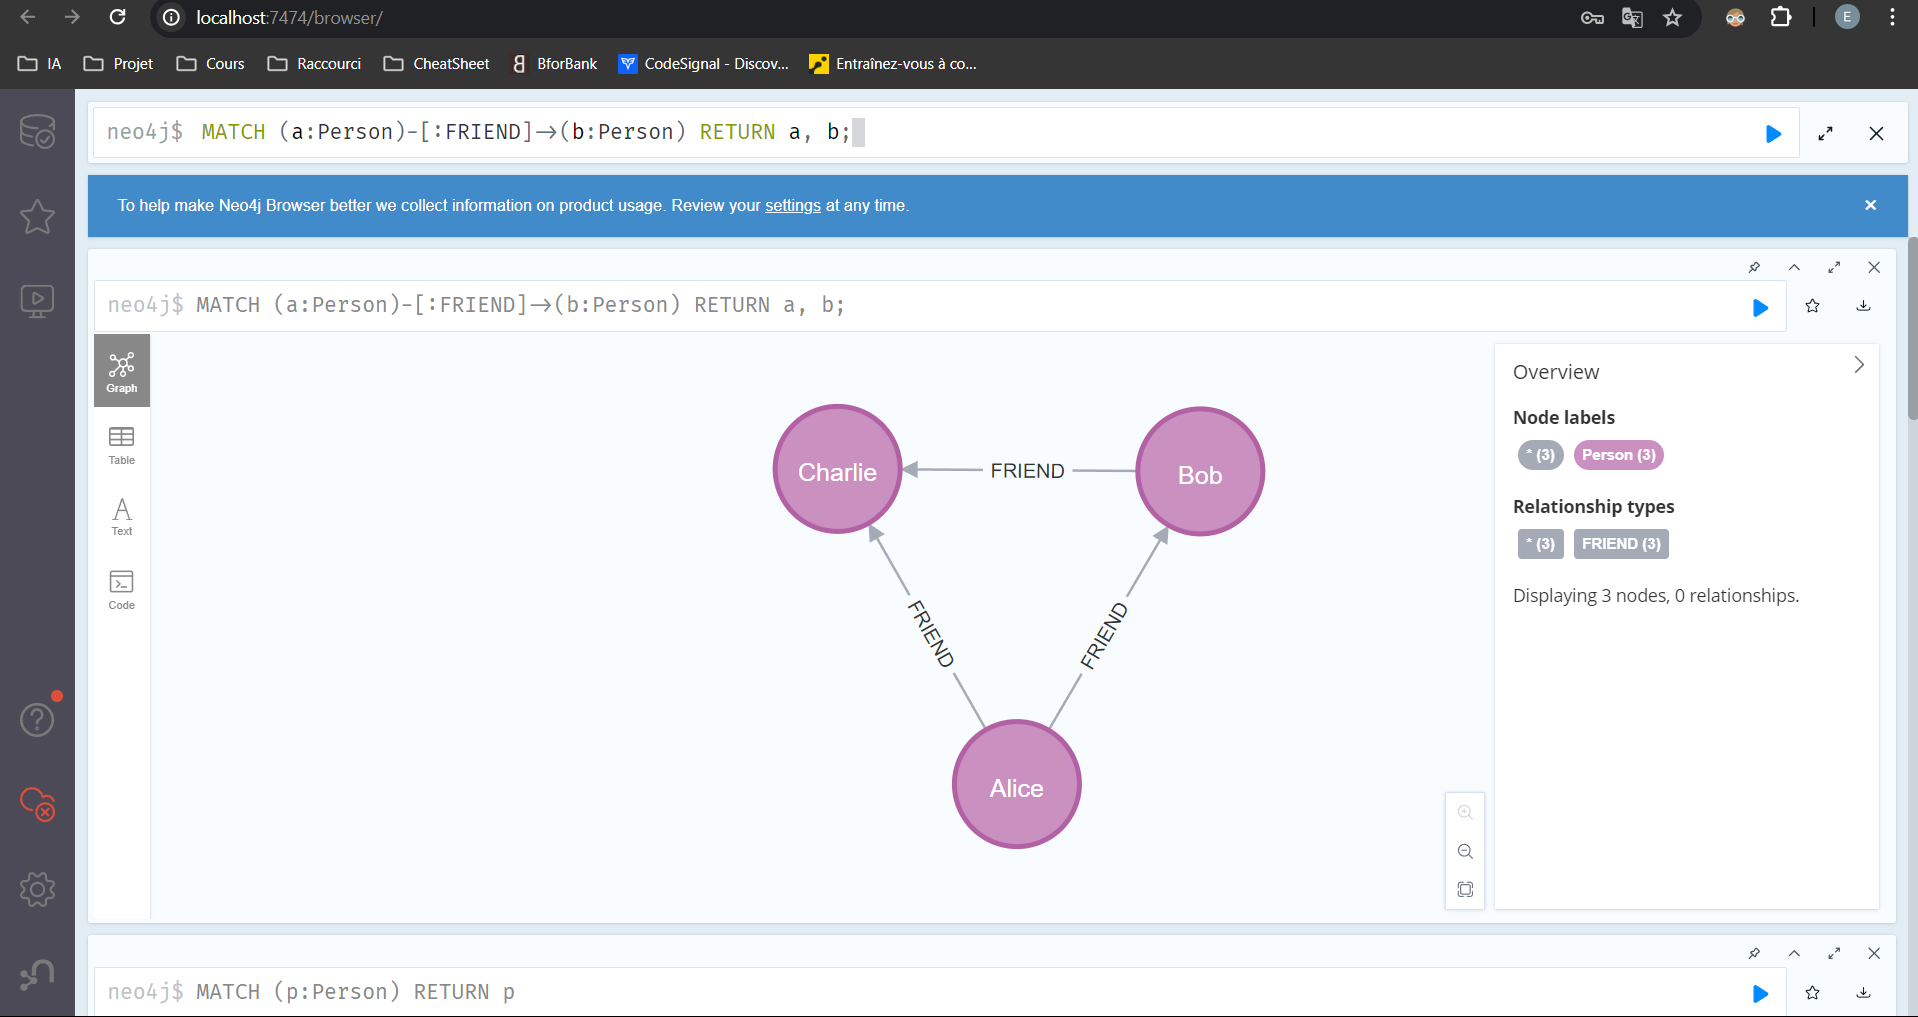

# Interroger la base de données Neo4j avec Python
## Récupérer toutes les personnes enregistrées

In [ ]:
query_all_persons = "MATCH (p:Person) RETURN p.name, p.age"

results = run_query(query_all_persons)

print("Liste des personnes dans la base de données :")
for record in results:
    print(f"Nom: {record['p.name']}, Âge: {record['p.age']}")

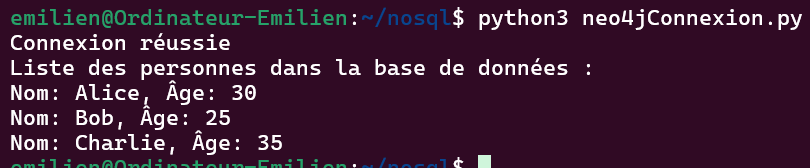

## Trouver les amis d’une personne spécifique

In [ ]:
def get_friends(name):
    query = f"""
    MATCH (p:Person {{name: '{name}'}})-[:FRIEND]->(friend)
    RETURN friend.name, friend.age
    """
    results = run_query(query)
    return results

name = "Alice"
friends = get_friends(name)

print(f"Les amis de {name} sont :")
for record in friends:
    print(f"Nom: {record['friend.name']}, Âge: {record['friend.age']}")

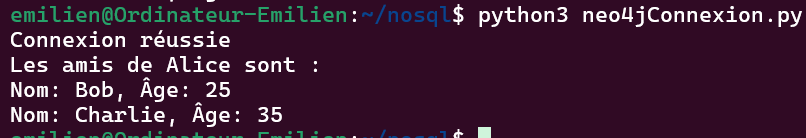

## Supprimer tous les nœuds et relations

In [ ]:
delete_query = "MATCH (n) DETACH DELETE n"

run_query(delete_query)

print("Tous les nœuds et relations ont été supprimés.")

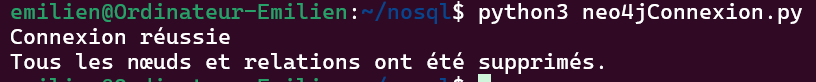

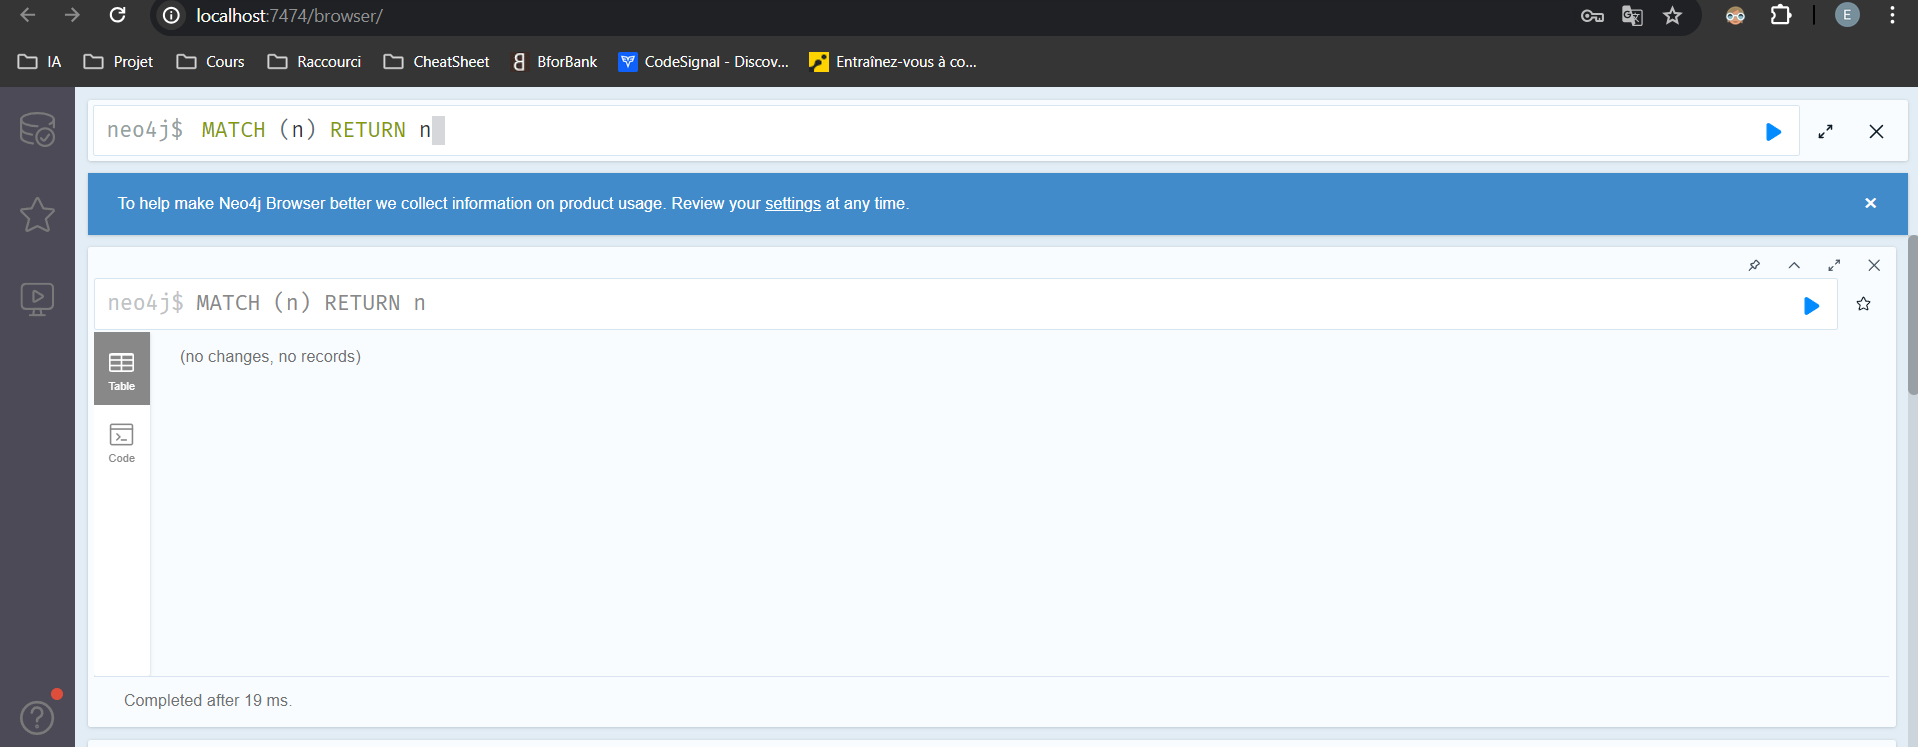